**SUMMARY OF PROBLEM STATEMENT:**
      Pneumonia is an infection in one or both lungs. The diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lungcancer, or post-radiation or surgical changes.Comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis.
      A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift.
     So automating Pneumonia screening in chest radiographs, and providing affected area details through bounding box will assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare.

In [1]:
#Upgrading the kaggle version
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674/kaggle-1.5.6-cp36-none-any.whl
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [2]:
#Loading the rsna-pneumonia-detection-challenge dataset
import os
os.environ['KAGGLE_USERNAME'] = "elamathisenguttuvan" # username from the json file
os.environ['KAGGLE_KEY'] = "fb56946ad9d3fd4da4d5d2287a3498df" # key from the json file
!kaggle competitions download -c rsna-pneumonia-detection-challenge

rsna-pneumonia-detection-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#Installing pydicom library
!pip3 install -q pydicom         

In [4]:
#Extracting the dataset files
path_to_zip_file='/content/rsna-pneumonia-detection-challenge.zip'
directory_to_extract_to='/content/rsna-pneumonia-detection-challenge'
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [5]:
#Loading train and test images
TEST_DIR='/content/rsna-pneumonia-detection-challenge/stage_2_test_images'
TRAIN_DIR='/content/rsna-pneumonia-detection-challenge/stage_2_train_images'

In [6]:
#The train and test pathnames are retrieved and stored in array format
import glob
test_images = glob.glob(TEST_DIR + '/*.dcm')
train_images=glob.glob(TRAIN_DIR + '/*.dcm')

In [7]:
#Loading the labels dataset
import pandas as pd
train_lbls=pd.read_csv('/content/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv')
test_lbls=pd.read_csv('/content/rsna-pneumonia-detection-challenge/stage_2_sample_submission.csv')
detail=pd.read_csv('/content/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')

In [8]:
#Converting the dcm images to array 
import pydicom
img_data=[]
for i in range(600):
  ds = pydicom.read_file(train_images[i]) 
  img=ds.pixel_array
  img_data.append(img)

In [9]:
#Creating a array of patient ID's
ID=[]
for i in range(600):
  ds = pydicom.read_file(train_images[i]) 
  id=ds.PatientID
  ID.append(id)

In [10]:
dict={'patientId':ID,'Image':img_data}

In [11]:
import pandas as pd
from pandas import DataFrame
image_df=pd.DataFrame(dict)

print("The patient ID's and their corresponding image arrays")
image_df.head()

The patient ID's and their corresponding image arrays


,patientId,Image
0,c475fdfe-d6b3-44e2-930a-fce8f353299f,"[[42, 36, 30, 28, 26, 21, 19, 20, 16, 16, 15, ..."
1,1888f3d8-c1f6-48e0-812f-6c13a127c41e,"[[4, 0, 0, 1, 5, 78, 83, 75, 74, 70, 65, 60, 5..."
2,76b180ab-242f-45d3-bce1-68df00c5ef45,"[[84, 72, 59, 48, 37, 30, 25, 21, 15, 13, 11, ..."
3,82cd9979-23bc-422a-86a4-3987ffccf77b,"[[43, 37, 30, 25, 22, 19, 16, 15, 10, 9, 7, 5,..."
4,5d2ac0d8-fd33-4b23-9b1f-c7bc4f13f625,"[[141, 140, 138, 136, 134, 132, 131, 130, 127,..."


In [12]:
train_data=pd.merge(train_lbls,detail,on='patientId')
print("The bounding boxes and the target class corresponding to patient ID's")
train_data.head(5)

The bounding boxes and the target class corresponding to patient ID's


,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [13]:
Data=pd.merge(train_data,image_df,on='patientId')
Data.head()

,patientId,x,y,width,height,Target,class,Image
0,05bb6f8d-453b-4e56-ae92-2600e058ba65,613.0,444.0,195.0,317.0,1,Lung Opacity,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
1,05bb6f8d-453b-4e56-ae92-2600e058ba65,613.0,444.0,195.0,317.0,1,Lung Opacity,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
2,05bb6f8d-453b-4e56-ae92-2600e058ba65,228.0,425.0,223.0,312.0,1,Lung Opacity,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
3,05bb6f8d-453b-4e56-ae92-2600e058ba65,228.0,425.0,223.0,312.0,1,Lung Opacity,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
4,0637b804-e693-48d1-8716-f7c63ce6162a,507.0,109.0,344.0,808.0,1,Lung Opacity,"[[0, 0, 2, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,..."


**DATA VISUALIZATION**

In [14]:
patientId_data=[]
Age=[]
patientSex=[]
Modality=[]
for i in range(600):
  ds = pydicom.read_file(train_images[i]) 
  Id=ds.PatientID
  age=ds.PatientAge
  patient_sex=ds.PatientSex
  modality=ds.Modality
  patientId_data.append(Id)
  Age.append(age)
  patientSex.append(patient_sex)
  Modality.append(modality)

In [15]:
dict={'patientId':patientId_data,'Age':Age,'patientSex':patientSex,'Modality':Modality}

In [16]:
trainData=pd.DataFrame(dict)

In [17]:
xData=pd.merge(train_data,trainData,on='patientId')
xData.head()

,patientId,x,y,width,height,Target,class,Age,patientSex,Modality
0,05bb6f8d-453b-4e56-ae92-2600e058ba65,613.0,444.0,195.0,317.0,1,Lung Opacity,58,F,CR
1,05bb6f8d-453b-4e56-ae92-2600e058ba65,613.0,444.0,195.0,317.0,1,Lung Opacity,58,F,CR
2,05bb6f8d-453b-4e56-ae92-2600e058ba65,228.0,425.0,223.0,312.0,1,Lung Opacity,58,F,CR
3,05bb6f8d-453b-4e56-ae92-2600e058ba65,228.0,425.0,223.0,312.0,1,Lung Opacity,58,F,CR
4,0637b804-e693-48d1-8716-f7c63ce6162a,507.0,109.0,344.0,808.0,1,Lung Opacity,70,M,CR


In [18]:
print("Count of unique patient ids in the dataset",Data['patientId'].nunique())
print("Total count of patient data in the dataset",Data['patientId'].count())

Count of unique patient ids in the dataset 600
Total count of patient data in the dataset 862


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Age distribution over pneumonia affected patients')

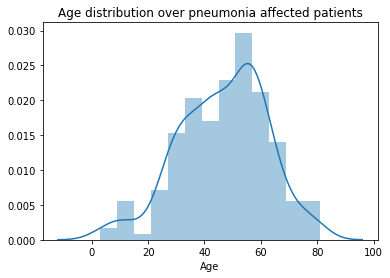

In [19]:
filter=xData.apply(lambda x:x['Target']==1,axis=1)
tar_lbls=xData[filter]
import seaborn as sns

plot=sns.distplot(tar_lbls['Age'])
plot.set_title("Age distribution over pneumonia affected patients")

From the figure we see that people of age between 50-60 are mostly found to be infected with pneumonia

Text(0, 0.5, 'Number of Occurrences')

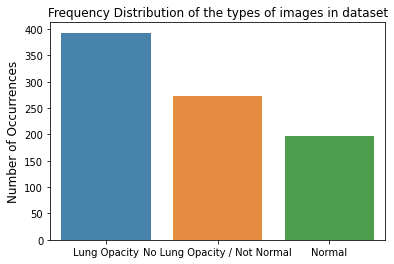

In [20]:
import matplotlib.pyplot as plt

class_count=xData['class'].value_counts()
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of the types of images in dataset')
plt.ylabel('Number of Occurrences', fontsize=12)

From the figure we infer that amongst the 10000 records,major data is provided for lung opacity patients and the remaining records are provided for non-pneumonia cases.

Text(0, 0.5, 'Number of Occurrences')

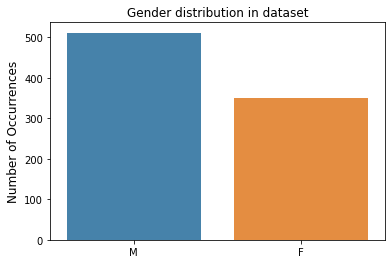

In [21]:
gender_count=xData['patientSex'].value_counts()
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Gender distribution in dataset')
plt.ylabel('Number of Occurrences', fontsize=12)


From the figure we see that the male cases are more than female cases recorded.

Text(0, 0.5, 'Number of Occurrences')

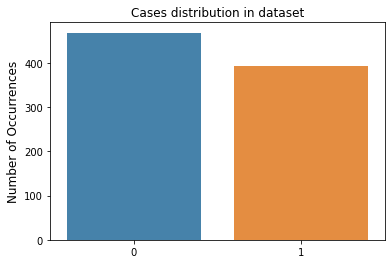

In [22]:
Positive_count=xData['Target'].value_counts()
sns.barplot(Positive_count.index, Positive_count.values, alpha=0.9)
plt.title('Cases distribution in dataset')
plt.ylabel('Number of Occurrences', fontsize=12)


The Negative cases are more in dataset as compared to positive cases

**Visualization of image with bounding box**

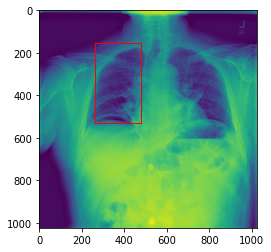

In [23]:
i=4
import pydicom
ds = pydicom.read_file(train_images[4]) 
image = ds.pixel_array 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
figure, ax = plt.subplots(1)
x=train_lbls.iloc[i]['x']
y=train_lbls.iloc[i]['y']
w=train_lbls.iloc[i]['width']
h=train_lbls.iloc[i]['height']
rect = patches.Rectangle((x,y),w,h, edgecolor='r', facecolor="none")
ax.imshow(image)
ax.add_patch(rect)

**PREPROCESSING DATA**

In [24]:
dict={'id':Data['patientId'],'image':Data['Image']}

In [25]:
import numpy as np
xData=pd.DataFrame(dict)
x_array=np.asarray(xData)
x_array.shape

(862, 2)

In [26]:
x_array[0][1]

array([[ 2,  2,  2, ...,  3,  2,  2],
       [ 2,  2,  2, ...,  4,  4,  4],
       [ 3,  3,  3, ...,  5,  4,  4],
       ...,
       [ 3,  7, 10, ..., 14, 17, 11],
       [ 4,  7, 10, ..., 12, 15,  8],
       [ 2,  5,  7, ...,  6,  9,  2]], dtype=uint8)

In [27]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
IMAGE_HEIGHT=224
IMAGE_WIDTH=224

X_train = np.zeros((600, IMAGE_HEIGHT, IMAGE_WIDTH,3))
for index in range(600):
    img = x_array[index][1]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))

In [28]:
X_train.shape

(600, 224, 224, 3)

In [29]:
dict={'id':Data['patientId'],'x':Data['x'],'y':Data['y'],'width':Data['width'],'height':Data['height']}
yData=pd.DataFrame(dict)
yData['x'].replace(np.nan,0,inplace=True)
yData['y'].replace(np.nan,0,inplace=True)
yData['width'].replace(np.nan,0,inplace=True)
yData['height'].replace(np.nan,0,inplace=True)
y_array=np.asarray(yData)

In [30]:
y_array[4][1]

507.0

In [31]:
masks = np.zeros((600, IMAGE_HEIGHT, IMAGE_WIDTH))
for i in range(600):
  x1 = int(y_array[i][1]*224/1024)
  x2 = int(y_array[i][3]*224/1024 + x1)
  y1 = int(y_array[i][2]*224/1024)
  y2 = int(y_array[i][4]*224/1024 + y1)

  masks[i][y1:y2,x1:x2]=1


In [32]:
X_train[123]

array([[[-0.78823531, -0.78823531, -0.78823531],
        [-0.78039217, -0.78039217, -0.78039217],
        [-0.78039217, -0.78039217, -0.78039217],
        ...,
        [-0.69411767, -0.69411767, -0.69411767],
        [-0.70980394, -0.70980394, -0.70980394],
        [-0.7019608 , -0.7019608 , -0.7019608 ]],

       [[-0.78039217, -0.78039217, -0.78039217],
        [-0.78039217, -0.78039217, -0.78039217],
        [-0.78823531, -0.78823531, -0.78823531],
        ...,
        [-0.66274512, -0.66274512, -0.66274512],
        [-0.7019608 , -0.7019608 , -0.7019608 ],
        [-0.73333335, -0.73333335, -0.73333335]],

       [[-0.78039217, -0.78039217, -0.78039217],
        [-0.79607844, -0.79607844, -0.79607844],
        [-0.79607844, -0.79607844, -0.79607844],
        ...,
        [-0.74901962, -0.74901962, -0.74901962],
        [-0.72549021, -0.72549021, -0.72549021],
        [-0.74117649, -0.74117649, -0.74117649]],

       ...,

       [[-0.18431371, -0.18431371, -0.18431371],
        [-0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


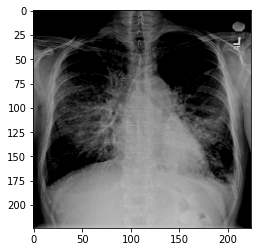

In [33]:
plt.imshow(X_train[123])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


23 70 56 101


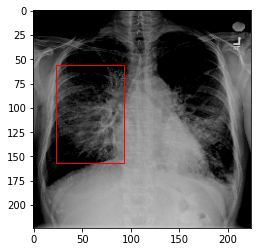

In [34]:
x1 = int(y_array[123][1]*224/1024)
x2 = int(y_array[123][3]*224/1024)
y1 = int(y_array[123][2]*224/1024)
y2 = int(y_array[123][4]*224/1024)
figure, ax = plt.subplots(1)
rect = patches.Rectangle((x1,y1),x2,y2, edgecolor='r', facecolor="none")
ax.imshow(X_train[123])
ax.add_patch(rect)
print(x1,x2,y1,y2)

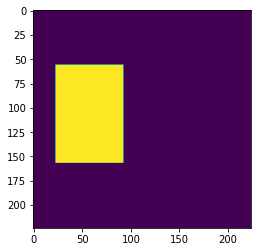

In [35]:
plt.imshow(masks[123])

In [36]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

ALPHA=1
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = UpSampling2D()(x)
    x = UpSampling2D()(x)
    x = UpSampling2D()(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((224, 224))(x)

    return Model(inputs=model.input, outputs=x)

In [37]:
model = create_model(False)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

In [38]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [39]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [42]:
import tensorflow
model.fit(X_train, masks, validation_data = (X_train,masks), epochs=1, batch_size=1, verbose=1)

600/600 [==============================] - 451s 752ms/step - loss: 9.6646 - dice_coefficient: 0.0755 - val_loss: 9.4310 - val_dice_coefficient: 0.1039


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


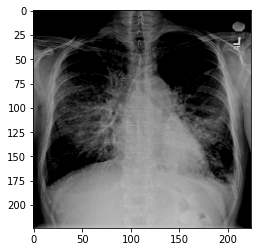

In [47]:
n = 123
sample_image = X_train[n]
plt.imshow(sample_image)

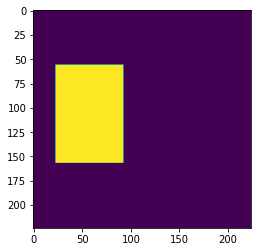

In [48]:
plt.imshow(masks[n])